In [77]:
import pandas as pd

iris=pd.read_excel("C:/Users/ws317/Downloads/iris_data.xlsx")

In [78]:
iris

,Unnamed: 0,sepal length (cm),petal length (cm),target
0,0,5.1,1.4,0
1,1,4.9,1.4,0
2,2,4.7,1.3,0
3,3,4.6,1.5,0
4,4,5.0,1.4,0
...,...,...,...,...
95,145,6.7,5.2,2
96,146,6.3,5.0,2
97,147,6.5,5.2,2
98,148,6.2,5.4,2


In [79]:
iris_data=iris.drop(labels=['Unnamed: 0',"target"],axis=1)

In [80]:
print(iris_data)

    sepal length (cm)  petal length (cm)
0                 5.1                1.4
1                 4.9                1.4
2                 4.7                1.3
3                 4.6                1.5
4                 5.0                1.4
..                ...                ...
95                6.7                5.2
96                6.3                5.0
97                6.5                5.2
98                6.2                5.4
99                5.9                5.1

[100 rows x 2 columns]


In [81]:
import numpy as np
iris_data=np.column_stack((iris_data["petal length (cm)"],iris_data["sepal length (cm)"]))

In [82]:
print(iris_data[:5])

[[1.4 5.1]
 [1.4 4.9]
 [1.3 4.7]
 [1.5 4.6]
 [1.4 5. ]]


In [105]:
import numpy as np
iris_target=iris.drop(labels=['Unnamed: 0',"sepal length (cm)","petal length (cm)"],axis=1)
iris_target=np.array(iris_target["target"])
print(iris_target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [106]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(iris_data,iris_target,random_state=42)

In [107]:
print(train_input.shape,test_input.shape)
print(train_target.shape,test_target.shape )

(75, 2) (25, 2)
(75,) (25,)


In [108]:
train_target

array([0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 0, 2, 2], dtype=int64)

In [114]:
test_target

array([2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2], dtype=int64)

In [110]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.fit(test_input,test_target)

KNeighborsClassifier()

In [111]:
train_input,test_input,train_target,test_target=train_test_split(
    iris_data,iris_target,
    stratify=iris_target ,random_state=42)

In [115]:
test_target

array([2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2], dtype=int64)

In [113]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.fit(test_input,test_target)

KNeighborsClassifier()

In [122]:
print(kn.predict([[3.2,4.6]]))

[0]


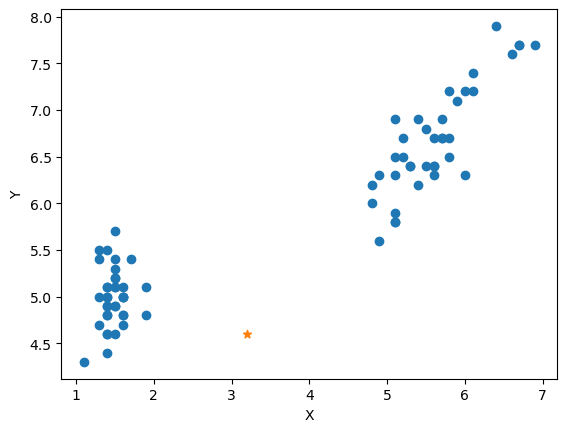

In [124]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(3.2,4.6,marker="*")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [125]:
distance, index=kn.kneighbors([[3.2,4.6]])
print(distance,index)

[[1.33416641 1.58113883 1.7        1.74642492 1.77200451]] [[ 2 21 22 13 15]]


In [126]:
train_input[index]

array([[[1.5, 5.7],
        [5.5, 6.8],
        [1.5, 5.1],
        [5.7, 6.9],
        [1.3, 5.5]]])

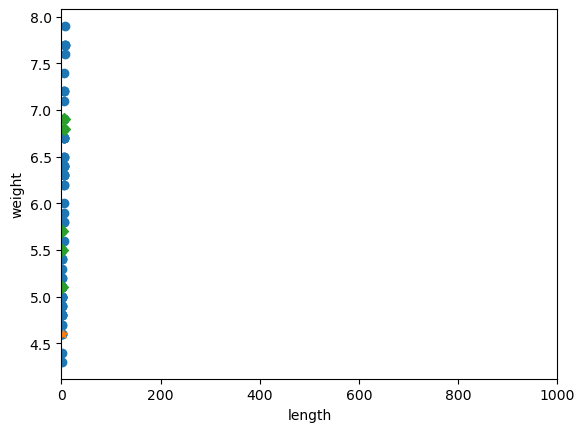

In [127]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(3.2,4.6,marker="*")
plt.scatter(train_input[index,0],train_input[index,1],marker="D")
plt.xlabel("length")
plt.ylabel("weight")
plt.xlim((0,1000))
plt.show()

In [128]:
mean=np.mean(train_input,axis=0)
std=np.std(train_input,axis=0)

In [129]:
print(mean,std)

[3.572 5.848] [2.10171739 0.96199238]


In [130]:

train_scaled=(train_input-mean)/std

print(train_scaled[:5])

[[ 0.82218476  0.57380912]
 [ 0.63186421 -0.2577983 ]
 [-0.98586042 -0.15384737]
 [ 0.82218476  0.57380912]
 [ 0.72702448  0.05405448]]


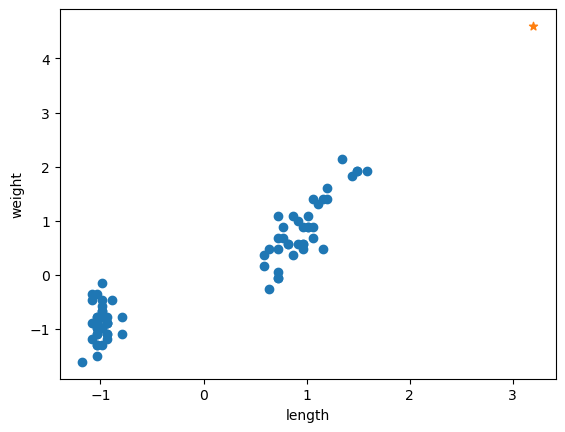

In [131]:
import matplotlib.pyplot as plt

# 3.2, 4.6 좌표 확인
# test 셋(샘플)도 표준화 처리해줘야 함

plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(3.2,4.6,marker="*")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [132]:
new=([3.2,4.6]-mean)/std
print(new)

[-0.17699811 -1.29730758]


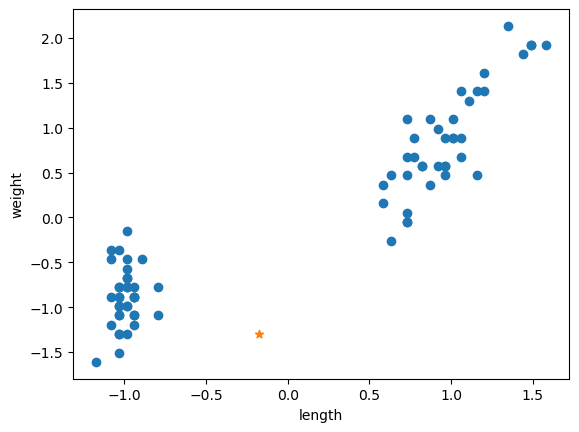

In [133]:
import matplotlib.pyplot as plt

# test 셋(샘플)도 표준화 처리해줘야 함

plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker="*")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [134]:
# 모델 학습
kn.fit(train_scaled,train_target)

KNeighborsClassifier()

In [135]:
test_scaled=(test_input-mean)/std

In [136]:
kn.score(test_scaled,test_target)*100

100.0

In [137]:
kn.predict([new])

array([0], dtype=int64)

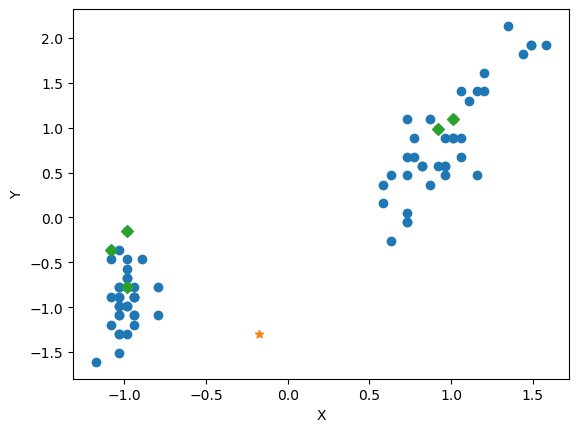

In [139]:
import matplotlib.pyplot as plt

# 25,150 좌표 확인
# test 셋(샘플)도 표준화 처리해줘야 함

plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker="*")
plt.scatter(train_scaled[index,0],train_scaled[index,1],marker="D")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()